# **Week 1: Introduction to Financial Data Analysis and Python Basics (Beginner Level)**

## **Contents**
- Numpy
- Pandas

## Numpy in Finance

In [ ]:
# Generating Random Numbers
import numpy as np

random_numbers = np.random.rand(10)  # Generate 1000 random numbers from a uniform distribution between 0 and 1
print(random_numbers)

[0.77914227 0.73948427 0.28437597 0.78569466 0.18355496 0.28246366
 0.96992758 0.07564049 0.03796548 0.5766245 ]


In [ ]:
#  Reshaping Arrays
import numpy as np

data = np.array([1, 2, 3, 4, 5, 6])
reshaped_data = np.reshape(data, (2, 3))
print(reshaped_data)

[[1 2 3]
 [4 5 6]]


In [ ]:
# Computing Mean and Standard Deviation
import numpy as np

returns = np.array([0.05, -0.02, 0.03, 0.01, -0.04])
mean_return = np.mean(returns)
# standard deviation measures the fluctuation in the fund's share price or returns over time, that how much it away from mean.
std_deviation = np.std(returns) # It's not Alpha or Beta in Finance

print(mean_return)
print(std_deviation)

0.005999999999999998
0.032619012860600184


COV-  0.00047
CORR-  0.8497831579263382


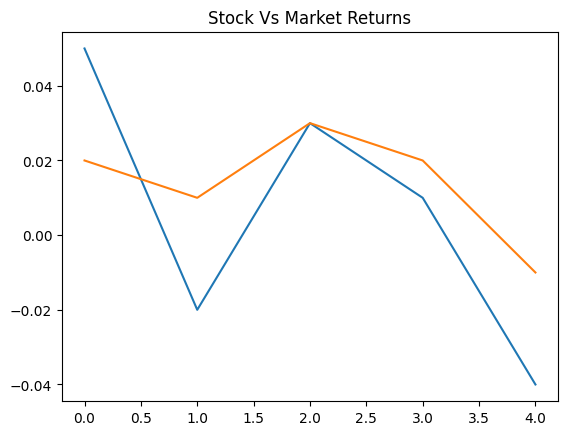

In [ ]:
# Calculating Covariance and Correlation
import numpy as np
import matplotlib.pyplot as plt

stock_returns = np.array([0.05, -0.02, 0.03, 0.01, -0.04])
market_returns = np.array([0.02, 0.01, 0.03, 0.02, -0.01])

# covariance (-inf to +inf) can predict how two stocks might perform relative to each other in the future. It determine if stocks' returns tend to move with or against each other.
covariance = np.cov(stock_returns, market_returns)[0, 1]

# Scaled version of covariance as it does not affect by change in scale and limit from -1 to +1.
correlation = np.corrcoef(stock_returns, market_returns)[0, 1]
print("COV- ",covariance)
print("CORR- ",correlation)

plt.plot(stock_returns)
plt.plot(market_returns)
plt.title("Stock Vs Market Returns")
plt.show()

[0.04741069 0.05442479 0.03741865 0.03847234 0.0591147  0.05805019
 0.02591801 0.01869803 0.05792194 0.03022023 0.0634055  0.07097582]


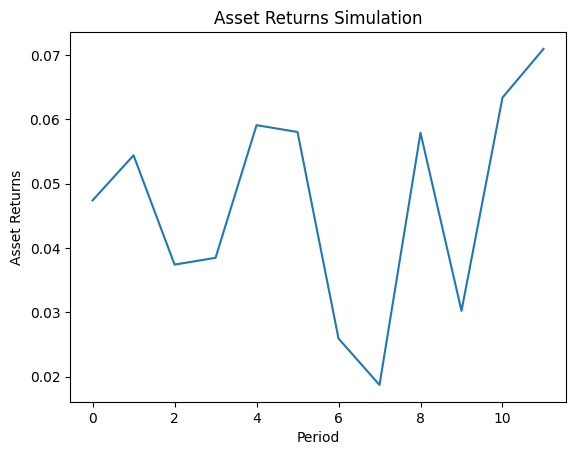

In [ ]:
# Simulating Asset Returns
import numpy as np
import matplotlib.pyplot as plt
mean = 0.05
std_dev = 0.02
num_periods = 12

asset_returns = np.random.normal(mean, std_dev, num_periods)
print(asset_returns)

plt.plot(list(range(num_periods)), asset_returns)
plt.xlabel("Period")  # add X-axis label
plt.ylabel("Asset Returns")  # add Y-axis label
plt.title("Asset Returns Simulation")  # add title
plt.show()

In [ ]:
# Performing Matrix Operations
import numpy as np

matrix_a = np.array([[1, 2], [3, 4]])
matrix_b = np.array([[5, 6], [7, 8]])

matrix_sum = np.add(matrix_a, matrix_b)
matrix_product = np.dot(matrix_a, matrix_b)
print(matrix_sum)
print("-----------")
print(matrix_product)

[[ 6  8]
 [10 12]]
-----------
[[19 22]
 [43 50]]


In [ ]:
# Calculating Present Value
import numpy_financial as nf
rate = 0.06
nper = 10
pmt = -200
fv = 200000

# Present value (PV) is the current value of a future sum of money or stream of cash flows given a specified rate of return.
present_value = nf.pv(rate/12, nper*12, pmt, fv)
print(present_value)

-91911.85600739928


[1.01124421 1.02118894 1.00151892 0.98853205 0.9897496  1.01623911
 1.00059432 1.02368863 1.00315149 0.98330079 0.99460988 0.99355924]
[101.12442066 103.2671396  103.42399426 102.23793353 101.18995378
 102.83318869 102.89430473 105.33173012 105.66368166 103.89918135
 103.33915202 102.67356979]


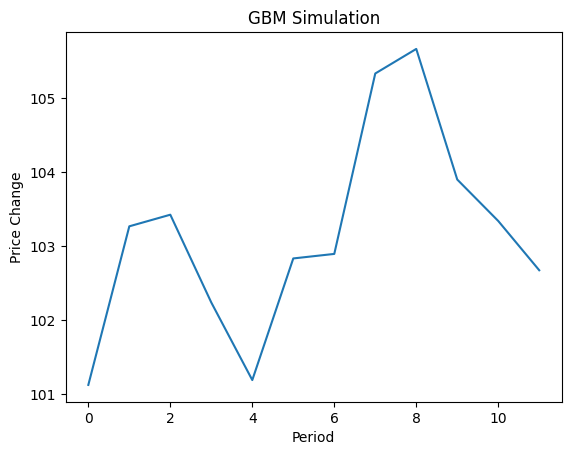

In [ ]:
# Simulating Geometric Brownian Motion (GBM)
import numpy as np

initial_price = 100.0
drift = 0.01
volatility = 0.05
num_periods = 12

# Geometric Brownian motion is a widely used mathematical model for asset prices with the assumption of their constant volatilities.
periodic_returns = np.random.normal(drift/num_periods, volatility/np.sqrt(num_periods), num_periods) + 1
price_change = initial_price * np.cumprod(periodic_returns)

print(periodic_returns)
print(price_change)

plt.plot(list(range(num_periods)), price_change)
plt.xlabel("Period")  # add X-axis label
plt.ylabel("Price Change")  # add Y-axis label
plt.title("GBM Simulation")  # add title
plt.show()

VAR at 95%:  16.44853626951476
1 day VaR @ 95% confidence: 16.45
2 day VaR @ 95% confidence: 23.26
3 day VaR @ 95% confidence: 28.49
4 day VaR @ 95% confidence: 32.9
5 day VaR @ 95% confidence: 36.78
6 day VaR @ 95% confidence: 40.29
7 day VaR @ 95% confidence: 43.52
8 day VaR @ 95% confidence: 46.52
9 day VaR @ 95% confidence: 49.35
10 day VaR @ 95% confidence: 52.01
11 day VaR @ 95% confidence: 54.55
12 day VaR @ 95% confidence: 56.98
13 day VaR @ 95% confidence: 59.31
14 day VaR @ 95% confidence: 61.54
15 day VaR @ 95% confidence: 63.7


Text(0.5, 1.0, 'Max portfolio loss (VaR) over 15-day period')

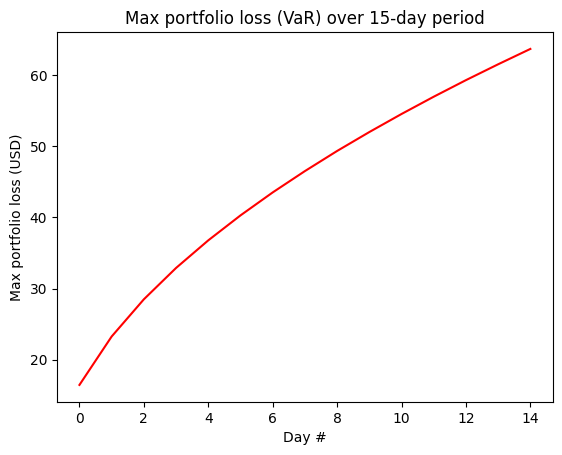

In [ ]:
# Calculating Value at Risk (VaR)
import numpy as np
from scipy.stats import norm

confidence_level = 0.05 #95%
initial_investment = 2000
mean_investment = 2000
std_investment = 10

"""Value at risk (VaR) is a measure of the risk of loss for investments. It estimates how much a set of investments might lose (with a given probability),
given normal market conditions, in a set time period such as a day."""
cutoff = norm.ppf(confidence_level, mean_investment, std_investment)
var_1d1 = initial_investment - cutoff
print("VAR at 95%: ",var_1d1)

var_array = []
num_days = int(15)
for x in range(1, num_days+1):
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

# Build plot
plt.plot(list(range(num_days)),var_array,"r")
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")

In [ ]:
# Calculating Exponential Moving Average (EMA)
import numpy as np

price_series = np.array([100, 105, 102, 98, 100, 104, 107])
period = 3

weights = np.exp(np.linspace(-1., 0., period))
weights /= np.sum(weights)

# The exponential moving average (EMA) is a technical chart indicator that tracks the price of an investment (like a stock or commodity) over time.
ema = np.convolve(price_series, weights, mode='valid')
print(ema)

[101.90862688 102.77414628 100.39856901  99.73233411 102.53304961]


In [ ]:
# Value Investment Strategy

import numpy as np

prices = np.array([100, 90, 80, 120, 150, 110])
book_values = np.array([80, 85, 90, 100, 120, 130])

price_to_book_ratio = prices / book_values
undervalued_stocks = price_to_book_ratio < 1

selected_stocks = prices[undervalued_stocks]
print(selected_stocks)

[ 80 110]


## Advance use cases of Numpy in Finance

In [ ]:
# Portfolio Optimisation

import numpy as np

"""
Markowitz created a formula that allows an investor to mathematically trade off risk tolerance and reward expectations, resulting in the ideal portfolio.

This theory was based on two main concepts:

1. Every investor’s goal is to maximize return for any level of risk
2. Risk can be reduced by diversifying a portfolio through individual, unrelated securities
"""

# Define expected returns, covariance matrix, and risk tolerance
expected_returns = np.array([0.05, 0.03, 0.06])
covariance_matrix = np.array([[0.04, 0.02, 0.01], [0.02, 0.06, 0.03], [0.01, 0.03, 0.05]])
risk_tolerance = 0.05

# Perform portfolio optimization
num_assets = len(expected_returns)

# Define the objective function to minimize portfolio risk
def portfolio_risk(weights):
    return np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))

# Define the constraint function for the sum of weights to be 1
def constraint_sum_of_weights(weights):
    return np.sum(weights) - 1.0

# Use scipy.optimize.minimize to find the minimum-risk portfolio
from scipy.optimize import minimize

# Set the initial weights to be equal weights
initial_weights = np.array([1 / num_assets] * num_assets)

# Define the bounds for each weight (0 to 1)
bounds = [(0, 1)] * num_assets

# Define the constraint dict for the sum of weights
constraint = {'type': 'eq', 'fun': constraint_sum_of_weights}

# Minimize the portfolio risk under the given constraints
result = minimize(portfolio_risk, initial_weights, method='SLSQP', bounds=bounds, constraints=constraint)

# Extract the optimized weights and calculate the portfolio return and risk
weights = result.x
portfolio_return = np.dot(weights, expected_returns)
portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))

print(weights)
print(portfolio_return)
print(portfolio_risk)

[0.53974073 0.07552603 0.38473324]
0.052336811718006464
0.16408285049858687


In [ ]:
# Black-Scholes Option Pricing Model
import numpy as np
from scipy.stats import norm

"""
This model is used to find the current value of a call option whose ultimate value depends on the price of the stock at the expiration date.
Because the stock price keeps changing, the value of this call option will change too
"""

"""
This function calculates the call and put option prices using the Black-Scholes formula. It takes the following inputs:

S: Current stock price
K: Strike price of the option
r: Risk-free interest rate
sigma: Volatility of the underlying asset
T: Time to maturity of the option
The function computes d1 and d2, which are intermediate variables used in the Black-Scholes formula.
Then, it calculates the call and put option prices using the cumulative distribution function (CDF) of the standard normal distribution.
"""

def black_scholes(S, K, r, sigma, T):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return call_price, put_price

stock_price = 100.0
strike_price = 105.0
risk_free_rate = 0.05
volatility = 0.2
time_to_maturity = 1.0

call_option_price, put_option_price = black_scholes(stock_price, strike_price, risk_free_rate, volatility, time_to_maturity)
print(call_option_price) # Which Price to Buy
print(put_option_price) # Which Price to Sell

8.021352235143176
7.9004418077181455


Text(0.5, 1.0, 'Monte Carlo Simulation for Risk Analysis')

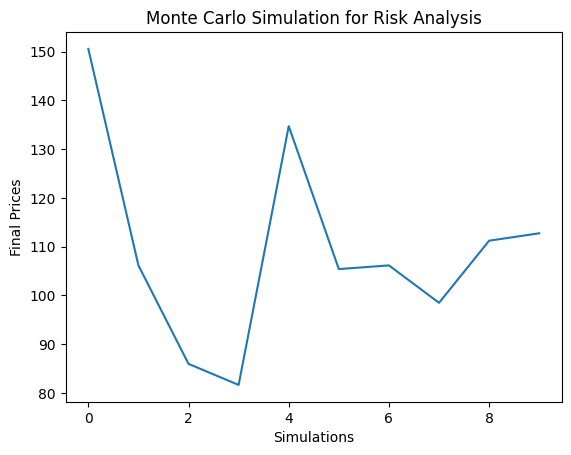

In [ ]:
# Monte Carlo Simulation for Risk Analysis

"""
Monte Carlo simulation performs risk analysis by building models of possible results
by substituting a range of values—called a probability distribution—for any factor that has inherent uncertainty.
"""

import numpy as np

initial_price = 100.0
drift = 0.05
volatility = 0.2
time_horizon = 1.0
num_simulations = 10
num_periods = 24

daily_returns = np.random.normal(drift/num_periods, volatility/np.sqrt(num_periods), (num_periods, num_simulations)) + 1
price_series = initial_price * np.cumprod(daily_returns, axis=0)

final_prices = price_series[-1]
mean_price = np.mean(final_prices)
std_deviation = np.std(final_prices)

plt.plot(final_prices)
plt.xlabel("Simulations")
plt.ylabel("Final Prices")
plt.title("Monte Carlo Simulation for Risk Analysis")

## Pandas in Finance

In [ ]:
import pandas as pd

# Assuming we have a DataFrame with stock data
# Dummy data
data = ['2023-05-21', '2023-05-22', '2023-05-23', '2023-05-23', '2023-05-23',
        '2023-05-25', '2023-05-26', '2023-05-26', '2023-05-27', '2023-05-30']
stock_names = ['ABC', 'XYZ', 'DEF', 'GHI', 'JKL', 'MNO', 'PQR', 'STU', 'VWX', 'YZA']
sector = ['IT','Finance','IT','Finance','IT','Energy','Retail','Data Science','AI','Finance']
prices = [100.50, 75.20, 120.80, 50.75, 90.25, 110.10, 85.60, 95.30, 105.80, 65.40]

# Create dataframe
df = pd.DataFrame({'Date': data, 'Stock Names': stock_names, 'Price': prices, 'Sector':sector})

# Grouping data by sector and calculating average price
avg_price_by_sector = df.groupby('Sector')['Price'].mean()
print(avg_price_by_sector)

Sector
AI              105.800000
Data Science     95.300000
Energy          110.100000
Finance          63.783333
IT              103.850000
Retail           85.600000
Name: Price, dtype: float64


In [ ]:
# Data Cleaning and Transformation
# Removing rows with missing values
df.dropna(inplace=True) # Watch Video Link in Description

# Converting date column to datetime format
df['Date'] = pd.to_datetime(df['Date']) # Watch Vidoe Link in Description
df.head()

,Date,Stock Names,Price,Sector
0,2023-05-21,ABC,100.50,IT
1,2023-05-22,XYZ,75.20,Finance
2,2023-05-23,DEF,120.80,IT
3,2023-05-23,GHI,50.75,Finance
4,2023-05-23,JKL,90.25,IT


In [ ]:
# Time Series Resampling and Aggregation
# Converting date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Resampling to monthly data and calculating average price
monthly_avg_price = df.resample('M', on='Date')['Price'].mean()
print(monthly_avg_price)

Date
2023-05-31    89.97
Freq: M, Name: Price, dtype: float64


In [ ]:
# Rolling Window Analysis
# Calculating 2-day rolling average
df['RollingAvg'] = df['Price'].rolling(window=2).mean()
df

,Date,Stock Names,Price,Sector,RollingAvg
0,2023-05-21,ABC,100.50,IT,NaN
1,2023-05-22,XYZ,75.20,Finance,87.850
2,2023-05-23,DEF,120.80,IT,98.000
3,2023-05-23,GHI,50.75,Finance,85.775
4,2023-05-23,JKL,90.25,IT,70.500
5,2023-05-25,MNO,110.10,Energy,100.175
6,2023-05-26,PQR,85.60,Retail,97.850
7,2023-05-26,STU,95.30,Data Science,90.450
8,2023-05-27,VWX,105.80,AI,100.550
9,2023-05-30,YZA,65.40,Finance,85.600


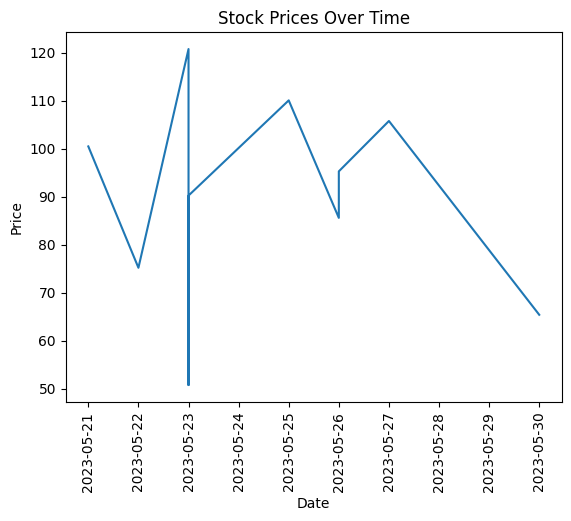

In [ ]:
# Data Visualization

import matplotlib.pyplot as plt
# Plotting line chart of stock prices
plt.plot(df['Date'], df['Price'])
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Pivot Tables
sales = pd.DataFrame({
    'Category': np.random.choice(['Electronics', 'Clothing', 'Home Decor'], size=10),
    'Month': np.random.choice(['January', 'February', 'March', 'April'], size=10),
    'Sales': np.random.randint(100, 1000, size=10)
})
# Creating a pivot table to summarize sales by product category
pivot_table = sales.pivot_table(values='Sales', index='Category', columns='Month', aggfunc='sum')
print(pivot_table)

Month        April  February  January   March
Category                                     
Clothing     468.0       NaN      NaN     NaN
Electronics  985.0     802.0   1251.0   191.0
Home Decor     NaN       NaN      NaN  1804.0


In [ ]:
# Data Filtering and Selection
# Filtering stocks with price above 100
high_priced_stocks = df[df['Price'] > 100]
print(high_priced_stocks)

         Date Stock Names  Price  Sector
0  2023-05-21         ABC  100.5      IT
2  2023-05-23         DEF  120.8      IT
5  2023-05-25         MNO  110.1  Energy
8  2023-05-27         VWX  105.8      AI


In [ ]:
# Calculating daily returns
df['Return'] = df['Price'].pct_change()
df

,Date,Stock Names,Price,Sector,Return
0,2023-05-21,ABC,100.50,IT,NaN
1,2023-05-22,XYZ,75.20,Finance,-0.251741
2,2023-05-23,DEF,120.80,IT,0.606383
3,2023-05-23,GHI,50.75,Finance,-0.579884
4,2023-05-23,JKL,90.25,IT,0.778325
5,2023-05-25,MNO,110.10,Energy,0.219945
6,2023-05-26,PQR,85.60,Retail,-0.222525
7,2023-05-26,STU,95.30,Data Science,0.113318
8,2023-05-27,VWX,105.80,AI,0.110178
9,2023-05-30,YZA,65.40,Finance,-0.381853


In [ ]:
# Handling Time Zones
# Converting date column to datetime format and setting time zone
df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
df

,Date,Stock Names,Price,Sector,Return
0,2023-05-20 20:00:00-04:00,ABC,100.50,IT,NaN
1,2023-05-21 20:00:00-04:00,XYZ,75.20,Finance,-0.251741
2,2023-05-22 20:00:00-04:00,DEF,120.80,IT,0.606383
3,2023-05-22 20:00:00-04:00,GHI,50.75,Finance,-0.579884
4,2023-05-22 20:00:00-04:00,JKL,90.25,IT,0.778325
5,2023-05-24 20:00:00-04:00,MNO,110.10,Energy,0.219945
6,2023-05-25 20:00:00-04:00,PQR,85.60,Retail,-0.222525
7,2023-05-25 20:00:00-04:00,STU,95.30,Data Science,0.113318
8,2023-05-26 20:00:00-04:00,VWX,105.80,AI,0.110178
9,2023-05-29 20:00:00-04:00,YZA,65.40,Finance,-0.381853


## Pandas Advance

In [ ]:
# Calculating 50-day and 200-day moving averages
df['50-day MA'] = df['Price'].rolling(window=3).mean()
df['200-day MA'] = df['Price'].rolling(window=5).mean()
df

,Date,Stock Names,Price,Sector,Return,50-day MA,200-day MA
0,2023-05-20 20:00:00-04:00,ABC,100.50,IT,NaN,NaN,NaN
1,2023-05-21 20:00:00-04:00,XYZ,75.20,Finance,-0.251741,NaN,NaN
2,2023-05-22 20:00:00-04:00,DEF,120.80,IT,0.606383,98.833333,NaN
3,2023-05-22 20:00:00-04:00,GHI,50.75,Finance,-0.579884,82.250000,NaN
4,2023-05-22 20:00:00-04:00,JKL,90.25,IT,0.778325,87.266667,87.50
5,2023-05-24 20:00:00-04:00,MNO,110.10,Energy,0.219945,83.700000,89.42
6,2023-05-25 20:00:00-04:00,PQR,85.60,Retail,-0.222525,95.316667,91.50
7,2023-05-25 20:00:00-04:00,STU,95.30,Data Science,0.113318,97.000000,86.40
8,2023-05-26 20:00:00-04:00,VWX,105.80,AI,0.110178,95.566667,97.41
9,2023-05-29 20:00:00-04:00,YZA,65.40,Finance,-0.381853,88.833333,92.44


In [ ]:
# Portfolio Performance Analysis
dates = pd.date_range(start='2022-01-01', periods=10, freq='D')
portfolio_value = np.random.randint(1000, 5000, size=10)

# Create dataframe
df = pd.DataFrame({'Date': dates, 'Portfolio Value': portfolio_value})

# Calculating portfolio returns
df['Return'] = df['Portfolio Value'].pct_change()

# Calculating portfolio performance metrics
cumulative_return = (1 + df['Return'].iloc[1:]).cumprod() - 1
print(list(cumulative_return))
annualized_return = (1 + list(cumulative_return)[-1]) ** (252/len(df)) - 1
print(annualized_return)
df

[0.8128911138923653, 1.3929912390488108, 1.2171464330413015, 0.30725907384230267, -0.3110137672090113, 0.5400500625782227, 1.2302878598247808, 0.49123904881101366, 0.031914893617021045]
1.2071192205190289


,Date,Portfolio Value,Return
0,2022-01-01,1598,NaN
1,2022-01-02,2897,0.812891
2,2022-01-03,3824,0.319986
3,2022-01-04,3543,-0.073483
4,2022-01-05,2089,-0.410387
5,2022-01-06,1101,-0.472954
6,2022-01-07,2461,1.235241
7,2022-01-08,3564,0.448192
8,2022-01-09,2383,-0.331369
9,2022-01-10,1649,-0.308015


In [ ]:
# Event Studies
# Create dummy DataFrame with stock and event data
df = pd.DataFrame({
    'Event': ['Earnings Announcement'] * 10,
    'Stock Return': np.random.uniform(-0.05, 0.05, 10),
    'Market Return': np.random.uniform(-0.03, 0.03, 10)
})

# Filtering data for a specific event
event_df = df[df['Event'] == 'Earnings Announcement']

# Calculating abnormal returns around the event
event_df['Abnormal Return'] = event_df['Stock Return'] - event_df['Market Return']
event_df

,Event,Stock Return,Market Return,Abnormal Return
0,Earnings Announcement,-0.002127,-0.028544,0.026417
1,Earnings Announcement,0.021370,-0.024896,0.046266
2,Earnings Announcement,0.015162,-0.006480,0.021642
3,Earnings Announcement,0.045195,0.008797,0.036397
4,Earnings Announcement,0.048886,-0.014638,0.063524
5,Earnings Announcement,0.007540,0.003330,0.004211
6,Earnings Announcement,-0.014814,-0.027782,0.012969
7,Earnings Announcement,-0.012066,-0.021378,0.009313
8,Earnings Announcement,-0.022036,-0.007873,-0.014163
9,Earnings Announcement,0.036122,0.020976,0.015146


In [ ]:
# Risk Analysis and VaR Calculation
# Calculating portfolio volatility
volatility = np.std(df['Stock Return'])

# Calculating Value at Risk (VaR) at a specific confidence level
confidence_level = 0.95
var = np.percentile(df['Stock Return'], 100 - confidence_level * 100)
print(volatility)
print(var)

0.02411869224362329
-0.018786004559938833


In [ ]:
# Fundamental Analysis
import random
num_rows = 10
df = pd.DataFrame()  # Limit the DataFrame to the desired number of rows

# Generate random values for Net Income, Revenue, and Shareholders Equity
df['Net Income'] = [random.randint(1000, 10000) for _ in range(num_rows)]
df['Revenue'] = [random.randint(5000, 20000) for _ in range(num_rows)]
df['Shareholders Equity'] = [random.randint(10000, 50000) for _ in range(num_rows)]


# Calculating financial ratios
df['Profit Margin'] = df['Net Income'] / df['Revenue']
df['Return on Equity'] = df['Net Income'] / df['Shareholders Equity']

df.head()

,Net Income,Revenue,Shareholders Equity,Profit Margin,Return on Equity
0,1202,16629,18819,0.072283,0.063872
1,9463,9077,25131,1.042525,0.376547
2,9462,9144,34472,1.034777,0.274484
3,2851,7943,20420,0.358932,0.139618
4,7879,9564,24234,0.823818,0.325122


In [ ]:
import plotly.graph_objects as go
import numpy as np

# Generate random data following a normal distribution
data = np.random.normal(loc=0, scale=1, size=1000)

# Create a histogram using Plotly
fig = go.Figure(data=[go.Histogram(x=data)])
fig.show()


"""

"""

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# Generate dummy data
np.random.seed(42)
dates = pd.date_range(start='2022-01-01', end='2022-01-31', freq='D')
complaints = np.random.negative_binomial(n=5, p=0.3, size=len(dates))

# Create a DataFrame
data = pd.DataFrame({'Date': dates, 'Day': dates.day, 'Weekday': dates.weekday, 'Complaints': complaints})
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['Day', 'Weekday']], data['Complaints'], test_size=0.2, random_state=42)

# Print the training set
print("\nTraining Set:")
print(y_train)




Training Set:
24    16
12     5
0     15
4      7
16     6
5      6
13    21
11     9
22     4
1     11
2      7
25     9
3     13
21    17
26     4
18     9
30     7
20    21
7     10
10     6
14    17
28    20
19    22
6     12
Name: Complaints, dtype: int64


In [ ]:
import plotly.graph_objects as go
import numpy as np

# Generate random data following a Poisson distribution
data = np.random.poisson(lam=5, size=1000)

# Create a histogram using Plotly
fig = go.Figure(data=[go.Histogram(x=data)])
fig.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import nbinom

# Generate random data following a negative binomial distribution
data = nbinom.rvs(n=5, p=0.5, size=1000)

# Create a histogram using Plotly
fig = go.Figure(data=[go.Histogram(x=data)])
fig.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import binom

# Generate random data following a binomial distribution
data = binom.rvs(n=1, p=0.3, size=1000)

# Create a histogram using Plotly
fig = go.Figure(data=[go.Histogram(x=data)])
fig.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gamma

# Generate random data following a gamma distribution
data = gamma.rvs(a=5, scale=2, size=1000)

# Create a histogram using Plotly
fig = go.Figure(data=[go.Histogram(x=data)])
fig.show()


# **Week 2 : Financial Data Analysis Course**

## Agenda
### 📍 Missing Data and Outliers

### Missing Data

In [ ]:
# Identifying Missing Data

import pandas as pd
import numpy as np

# Create dummy data
data = pd.DataFrame({'A': [1, 2, np.nan,31,np.nan,5,9,10,33,np.nan,54,np.nan, 4, 5],
                     'B': [9, 1.2,5,51,np.nan,35,59,10,13,np.nan,14,np.nan, 8, 5.3]})
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

A    4
B    3
dtype: int64


In [ ]:
# Handling Missing Data

import pandas as pd
import numpy as np

# Create dummy data
data = pd.DataFrame({
    'Age': [25, 30, np.nan, 35, 40, np.nan, 45],
    'Salary': [50000, 60000, 70000, np.nan, 80000, 90000, np.nan],
    'Education': ['Bachelor', 'Master', 'PhD', 'Bachelor', np.nan, 'Master', 'PhD'],
    'City': ['New York', 'Chicago', 'Chicago', 'New York', 'Boston', 'Boston', np.nan]
})

print("-------------Before Imputation------------------")
print(data)

# Fill missing values with mean for numerical data
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Salary'].fillna(data['Salary'].mean(), inplace=True)

# Fill missing values with median for numerical data
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Salary'].fillna(data['Salary'].median(), inplace=True)

# Fill missing values with mode for categorical data
data['Education'].fillna(data['Education'].mode()[0], inplace=True)
data['City'].fillna(data['City'].mode()[0], inplace=True)

print("-------------After Imputation------------------")
print(data)

-------------Before Imputation------------------
    Age   Salary Education      City
0  25.0  50000.0  Bachelor  New York
1  30.0  60000.0    Master   Chicago
2   NaN  70000.0       PhD   Chicago
3  35.0      NaN  Bachelor  New York
4  40.0  80000.0       NaN    Boston
5   NaN  90000.0    Master    Boston
6  45.0      NaN       PhD       NaN
-------------After Imputation------------------
    Age   Salary Education      City
0  25.0  50000.0  Bachelor  New York
1  30.0  60000.0    Master   Chicago
2  35.0  70000.0       PhD   Chicago
3  35.0  70000.0  Bachelor  New York
4  40.0  80000.0  Bachelor    Boston
5  35.0  90000.0    Master    Boston
6  45.0  70000.0       PhD    Boston


In [ ]:
# Detecting Outliers

import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Create dummy data with outliers
data = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85],
    'Salary': [50000, 60000, 70000, 80000, 90000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 1000000],
    'Education': ['Bachelor', 'Master', 'PhD', 'Bachelor', 'Master', 'PhD', 'Bachelor', 'Master', 'PhD', 'Bachelor', 'Master', 'PhD', 'Bachelor'],
    'City': ['New York', 'Chicago', 'Chicago', 'New York', 'Boston', 'Boston', 'New York', 'Chicago', 'Chicago', 'New York', 'Boston', 'Boston', 'New York']
})

# Add outliers to the data
data.loc[0, 'Age'] = 120
data.loc[2, 'Salary'] = 5000

data

,Age,Salary,Education,City
0,120,50000,Bachelor,New York
1,30,60000,Master,Chicago
2,35,5000,PhD,Chicago
3,40,80000,Bachelor,New York
4,45,90000,Master,Boston
5,50,100000,PhD,Boston
6,55,150000,Bachelor,New York
7,60,200000,Master,Chicago
8,65,250000,PhD,Chicago
9,70,300000,Bachelor,New York


In [ ]:
# Detect outliers using z-score
z_scores = (data[['Age', 'Salary']].apply(lambda x: (x - x.mean()) / x.std())).abs()
outliers = data[(z_scores > 2).any(axis=1)] # z_score > 2 means, data is away from 95% of the data because data is 2 Standard deviation away from mean.

# Print outliers
print("Outliers:")
print(outliers)

Outliers:
    Age   Salary Education      City
0   120    50000  Bachelor  New York
12   85  1000000  Bachelor  New York


In [ ]:
# Plot outliers using Plotly
fig = go.Figure()

# Scatter plot for Age column
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['Age'],
    mode='markers',
    name='Age'
))

# Scatter plot for Salary column
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['Salary'],
    mode='markers',
    name='Salary'
))

# Scatter plot for outliers
fig.add_trace(go.Scatter(
    x=outliers.index,
    y=outliers['Age'],
    mode='markers',
    name='Outliers',
    marker=dict(color='red', size=20)
))

fig.update_layout(title='Outlier Detection',
                  xaxis_title='Index',
                  yaxis_title='Value')

fig.show()

In [ ]:
# Handling Outliers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Dummy data with outliers
data = pd.DataFrame({
    'Age': [25, 30, 35, 120, 45, 50, 55, 60, 65, 70, 75, 80, 85],
    'Salary': [50000, 60000, 70000, 5000, 90000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 1000000]
})


# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=data['Age'], y=data['Salary'], mode='markers'))

# Update marker settings
fig.update_traces(marker=dict(symbol='square', size=10))

# Add axis labels and title
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Salary',
    title='Outlier Handling'
)

# Show the plot
fig.show()

In [ ]:
# Method 1: Winsorization
"""
Winsorizing or winsorization is the transformation of statistics by limiting extreme values in the statistical
data to reduce the effect of possibly spurious outliers
"""

def winsorize(data, col, q):
    lower = data[col].quantile(q)
    print(lower)
    upper = data[col].quantile(1 - q)
    print(upper)
    data[col] = np.where(data[col] < lower, lower, np.where(data[col] > upper, upper, data[col]))
    return data

# Apply winsorization to Age column
mod_data = winsorize(data, 'Age', 0.05)

# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=mod_data['Age'], y=mod_data['Salary'], mode='markers'))

# Update marker settings
fig.update_traces(marker=dict(symbol='square', size=10))

# Add axis labels and title
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Salary',
    title='Outlier Handling'
)

# Show the plot
fig.show()

29.68
87.23999999999997


In [ ]:
# Method 2: Trimming
def trim(data, col, q):
    lower = data[col].quantile(q)
    upper = data[col].quantile(1 - q)
    data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

# Apply trimming to Salary column
mod_data = trim(data, 'Salary', 0.05)

# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=mod_data['Age'], y=mod_data['Salary'], mode='markers'))

# Update marker settings
fig.update_traces(marker=dict(symbol='square', size=10))

# Add axis labels and title
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Salary',
    title='Outlier Handling'
)

# Show the plot
fig.show()

In [ ]:
# Method 3: Z-score
def remove_outliers_zscore(data, col, threshold):
    z_scores = (data[col] - data[col].mean()) / data[col].std()
    data = data[abs(z_scores) < threshold]
    return data

# Apply z-score method to Age column
mod_data = remove_outliers_zscore(data, 'Age', 2)

# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=mod_data['Age'], y=mod_data['Salary'], mode='markers'))

# Update marker settings
fig.update_traces(marker=dict(symbol='square', size=10))

# Add axis labels and title
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Salary',
    title='Outlier Handling'
)

# Show the plot
fig.show()

## **Week-2 : Day - 2**

### Data Normalization and Scaling Methods

**Min-Max Scaling:** This technique scales the data to a specific range, typically between 0 and 1. It preserves the relative relationships between the data points. It is suitable when the distribution of the data is not necessarily Gaussian.

**Example:** In the code, we use MinMaxScaler from scikit-learn to scale the financial data. The transformed data will have values between 0 and 1.

**Standardization:** This technique transforms the data to have a mean of 0 and a standard deviation of 1. It is suitable when the data follows a Gaussian distribution and is sensitive to outliers.

**Example:** In the code, we use StandardScaler from scikit-learn to standardize the financial data. The transformed data will have a mean of 0 and a standard deviation of 1.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create dummy financial data
financial_data = pd.DataFrame({
    'Stock_Price': [100, 150, 200, 75, 125],
    'Volume': [10000, 15000, 5000, 8000, 12000],
    'Market_Cap': [1000000, 2000000, 1500000, 500000, 3000000]
})

# Print the original financial data
print("Original Financial Data:")
print(financial_data)

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
minmax_scaled_data = minmax_scaler.fit_transform(financial_data)
minmax_scaled_df = pd.DataFrame(minmax_scaled_data, columns=financial_data.columns)

# Print the Min-Max scaled financial data
print("\nMin-Max Scaled Financial Data:")
print(minmax_scaled_df)

# Standardization
standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(financial_data)
standard_scaled_df = pd.DataFrame(standard_scaled_data, columns=financial_data.columns)

# Print the standardized financial data
print("\nStandardized Financial Data:")
print(standard_scaled_df)

Original Financial Data:
   Stock_Price  Volume  Market_Cap
0          100   10000     1000000
1          150   15000     2000000
2          200    5000     1500000
3           75    8000      500000
4          125   12000     3000000

Min-Max Scaled Financial Data:
   Stock_Price  Volume  Market_Cap
0          0.2     0.5         0.2
1          0.6     1.0         0.6
2          1.0     0.0         0.4
3          0.0     0.3         0.0
4          0.4     0.7         1.0

Standardized Financial Data:
   Stock_Price    Volume  Market_Cap
0    -0.697486  0.000000   -0.697486
1     0.464991  1.468051    0.464991
2     1.627467 -1.468051   -0.116248
3    -1.278724 -0.587220   -1.278724
4    -0.116248  0.587220    1.627467


## **When to use Which Technique?**

**Min-Max Scaling (Normalization):**
1. Use Min-Max scaling when you want to preserve the relative relationships between the data points.
2. It is suitable when you have a specific range (e.g., 0 to 1) in which you want to scale the data.
3. Min-Max scaling is helpful when the distribution of the data is not necessarily Gaussian and when you don't have strong outliers.
4. It is commonly used in scenarios where the exact values and their relationships are important, such as when interpreting index values or comparing values within a specific range.


**Standardization (Z-score Scaling):**

1. Use standardization when you want to transform the data to have a mean of 0 and a standard deviation of 1.
2. It is suitable when the data follows a Gaussian distribution or when your analysis or modeling techniques assume or perform better with standardized data.
3. Standardization is robust against outliers, making it useful when dealing with datasets that have extreme values.
4. It is commonly used in statistical analyses, machine learning algorithms (e.g., PCA), and when comparing variables with different units and scales.

# Handling Categorical Data in Finance

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create dummy financial data
financial_data = pd.DataFrame({
    'News_Sentiment': ['Positive', 'Negative', 'Neutral', 'Positive', 'Positive'],
    'Stock_Price': [100, 150, 200, 75, 125],
    'Volume': [10000, 15000, 5000, 8000, 12000]
})

# Print the original financial data
print("Original Financial Data:")
print(financial_data)

# Day 3: Handling Categorical Data and Encoding Techniques

# Label Encoding for News Sentiment
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
financial_data['Encoded_Sentiment'] = label_encoder.fit_transform(financial_data['News_Sentiment'])

# Print the encoded financial data
print("\nEncoded Financial Data (Label Encoding):")
print(financial_data)

# One-Hot Encoding for News Sentiment
onehot_encoder = OneHotEncoder(sparse=False)
encoded_features = onehot_encoder.fit_transform(financial_data[['Encoded_Sentiment']])
encoded_df = pd.DataFrame(encoded_features, columns=[f'Encoded_Sentiment_{value}' for value in label_encoder.classes_])
financial_data_encoded = pd.concat([financial_data, encoded_df], axis=1)

# Print the encoded financial data
print("\nEncoded Financial Data (One-Hot Encoding):")
print(financial_data_encoded)

# Day 4: Feature Engineering and Selection

# Feature Engineering - Create a new feature: Stock Price to Volume Ratio
financial_data_encoded['Price_to_Volume_Ratio'] = financial_data_encoded['Stock_Price'] / financial_data_encoded['Volume']

# Print the feature-engineered financial data
print("\nFeature-Engineered Financial Data:")
print(financial_data_encoded)

# Discretize target variable into classes
threshold = 0.01
financial_data_encoded['Price_Class'] = financial_data_encoded['Price_to_Volume_Ratio'].apply(lambda x: 'Positive' if x >= threshold else 'Negative')

# Feature Selection - Select top K features based on F-regression score
X = financial_data_encoded[['Encoded_Sentiment_Negative', 'Encoded_Sentiment_Neutral', 'Encoded_Sentiment_Positive', 'Stock_Price', 'Volume']]
y = financial_data_encoded['Price_Class']
selector = SelectKBest(score_func=f_classif, k=2)
selected_features = selector.fit_transform(X, y)
selected_features_df = pd.DataFrame(selected_features, columns=X.columns[selector.get_support()])

# Print the selected features
print("\nSelected Features:")
print(selected_features_df)
print(y)

# Day 5: Predicting Stock Price Movements Based on Financial News Sentiment Analysis

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features_df, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("\nAccuracy of Predicting Stock Price Movements:")
print(accuracy)

Original Financial Data:
  News_Sentiment  Stock_Price  Volume
0       Positive          100   10000
1       Negative          150   15000
2        Neutral          200    5000
3       Positive           75    8000
4       Positive          125   12000

Encoded Financial Data (Label Encoding):
  News_Sentiment  Stock_Price  Volume  Encoded_Sentiment
0       Positive          100   10000                  2
1       Negative          150   15000                  0
2        Neutral          200    5000                  1
3       Positive           75    8000                  2
4       Positive          125   12000                  2

Encoded Financial Data (One-Hot Encoding):
  News_Sentiment  Stock_Price  Volume  Encoded_Sentiment  \
0       Positive          100   10000                  2   
1       Negative          150   15000                  0   
2        Neutral          200    5000                  1   
3       Positive           75    8000                  2   
4       Positive   

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.genmod.families import Poisson
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create dummy data
data = pd.DataFrame({
    'Exposure': [11, 15, 20, 25, 31, 14, 19, 24, 29, 35, 12, 17, 23, 27, 33],
    'Event_Count': [10, 15, 18, 22, 30, 13, 17, 21, 26, 32, 16, 20, 25, 28, 34],
    'Predictor1': [1, 2, 3, 4, 9, 3, 4, 5, 6, 8, 2, 5, 7, 8, 10],
    'Predictor2': [2, 4, 6, 7, 10, 4, 6, 8, 9, 11, 5, 8, 9, 11, 12]
})

x = data[['Exposure','Predictor1','Predictor2']]
y = data[['Event_Count']]
exog, endog = sm.add_constant(x), y
mod = sm.GLM(endog, exog, family=sm.families.Poisson())
res = mod.fit()
print(res.summary())

# Residuals analysis
residuals = res.resid_pearson
print(residuals)

# Independence assumption: Plot residuals against predicted values
sns.scatterplot(x=res.fittedvalues, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show() #Random So Holds

# Equality of mean and variance assumption: Plot residuals against fitted values
sns.scatterplot(x=res.fittedvalues, y=np.sqrt(np.abs(residuals)))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Square Root of Absolute Residuals')
plt.title('Residuals vs Fitted Values')
plt.show() #Met Homoscedasticity

# Linearity assumption: Plot standardized residuals against predictors
studentized_residuals = res.resid_pearson
sns.scatterplot(x=data['Predictor1'], y=studentized_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predictor 1')
plt.ylabel('Standardized Residuals')
plt.title('Standardized Residuals vs Predictor 1')
plt.show() # No Pattern So okey

#suppress scientific notation
import numpy as np
np.set_printoptions(suppress=True)

#create instance of influence
influence = res.get_influence()

#obtain Cook's distance for each observation
cooks = influence.cooks_distance

# Absence of influential outliers: Plot Cook's distance
cooksd = influence.cooks_distance[0]
plt.stem(np.arange(len(cooksd)), cooksd, markerfmt=',')
plt.xlabel('Observation')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show() # We plot Cook's distance, which measures the influence of each observation on the regression coefficients. Observations with high Cook's distance values may be influential outliers.

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Event_Count   No. Observations:                   15
Model:                            GLM   Df Residuals:                       11
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -36.950
Date:                Mon, 17 Jul 2023   Deviance:                      0.79831
Time:                        12:24:57   Pearson chi2:                    0.797
No. Iterations:                     4   Pseudo R-squ. (CS):             0.8897
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1094      0.250      8.428      0.0

0    -0.397255
1     0.230717
2     0.031700
3     0.272428
4     0.293114
5    -0.234288
6    -0.128301
7    -0.248493
8     0.047351
9    -0.152821
10    0.327714
11   -0.020856
12    0.294457
13   -0.254815
14   -0.079254
dtype: float64


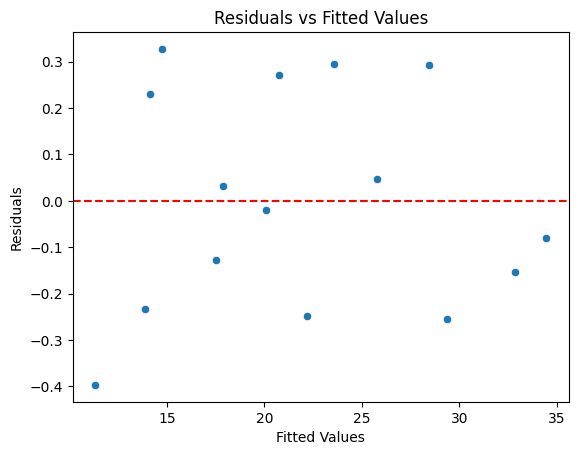

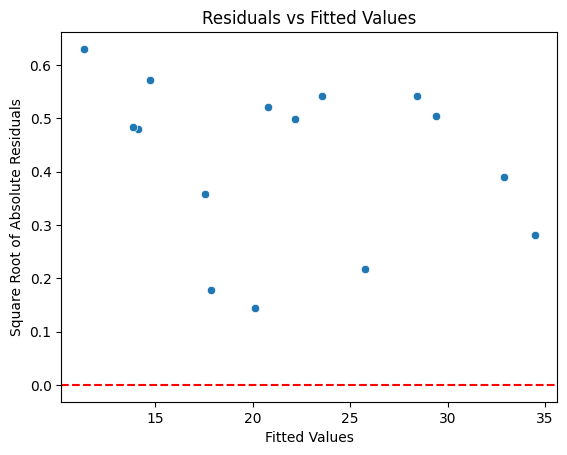

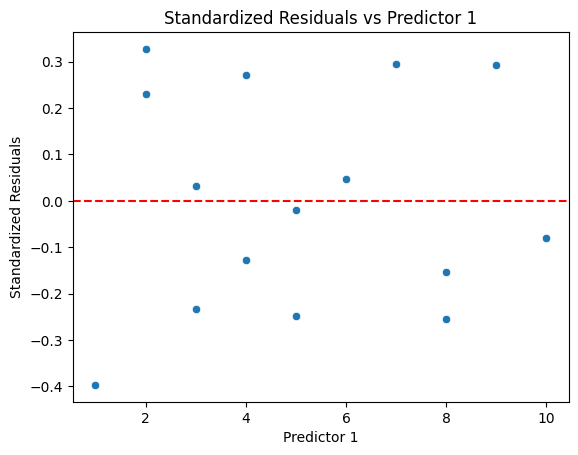

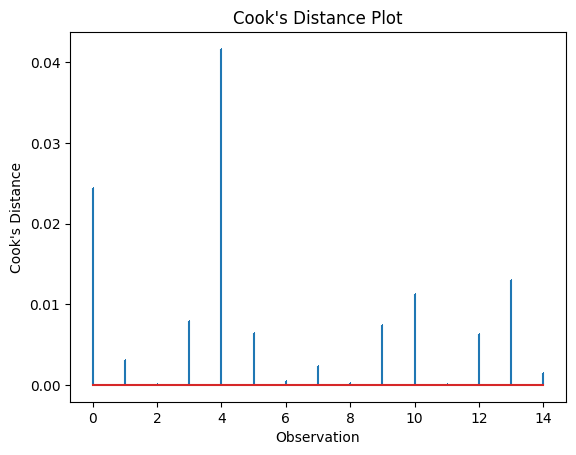

In [ ]:
#suppress scientific notation
import numpy as np
np.set_printoptions(suppress=True)

#create instance of influence
influence = res.get_influence()

#obtain Cook's distance for each observation
cooks = influence.cooks_distance

# Absence of influential outliers: Plot Cook's distance
cooksd = influence.cooks_distance[0]
plt.stem(np.arange(len(cooksd)), cooksd, markerfmt=',')
plt.xlabel('Observation')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show()

# We plot Cook's distance, which measures the influence of each observation on the regression coefficients.
# Observations with high Cook's distance values may be influential outliers.

# **Feature Engineering in Financial Data**

- Feature engineering is the process of creating new features from existing data or transforming existing features to improve the performance of machine learning models.

- It involves selecting relevant features, handling missing data, encoding categorical variables, scaling numerical features, and creating new features that capture meaningful patterns in the data.

**There are 4 ways to do it:**

1. Handling missing data.
2. Encoding Categorical Variables
3. Feature Scaling
4. Feature Selection

In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
finance = {
    'Date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'Stock': ['AAPL', 'GOOG', 'MSFT', 'AAPL', 'GOOG', 'MSFT', 'AAPL', 'GOOG', 'MSFT', 'AAPL'],
    'Price': [150.25, 2700.50, 350.75, 152.10, 2750.20, 355.90, 148.50, 2725.30, 345.60, 155.75],
    'Volume': [1000000, 800000, 1200000, 950000, 750000, 1100000, 900000, 850000, 1300000, 850000],
    'Revenue': [1500000, 2160000, 4215000, 1440000, 2062500, 3914900, 1336500, 2385250, 4482000, 1355500],
    'target' : [0,1,1,1,1,0,1,1,1,0]
}

# Create the DataFrame
data = pd.DataFrame(finance)

# Preprocess the data (handle missing values, encode categorical variables, etc.)


# Categorical Variable Encoding
label_encoder = LabelEncoder()
data['Stock'] = label_encoder.fit_transform(data['Stock'])

# Split data into features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,Date,Stock,Price,Volume,Revenue
5,2023-01-06,2,355.90,1100000,3914900
0,2023-01-01,0,150.25,1000000,1500000
7,2023-01-08,1,2725.30,850000,2385250
2,2023-01-03,2,350.75,1200000,4215000
9,2023-01-10,0,155.75,850000,1355500


In [34]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop('Date',axis=1))
X_test_scaled = scaler.transform(X_test.drop('Date',axis=1))

X_train_scaled

array([[ 1.50755672, -0.45043069,  1.09544512,  1.50106239],
       [-0.90453403, -0.63844012,  0.36514837, -0.71101389],
       [ 0.30151134,  1.71572319, -0.73029674,  0.09988533],
       [ 1.50755672, -0.45513893,  1.82574186,  1.77595746],
       [-0.90453403, -0.63341191, -0.73029674, -0.84337755],
       [ 0.30151134,  1.73848728, -1.46059349, -0.19575739],
       [-0.90453403, -0.63674881,  0.        , -0.76597458],
       [-0.90453403, -0.64004001, -0.36514837, -0.86078177]])

In [ ]:
# Feature selection
selector = SelectKBest(score_func=f_classif, k=4)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

In [38]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_selected, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


## **Project: Predicting stock price movements based on financial news sentiment analysis**

This project aims to predict stock price movements (e.g., increase or decrease) based on financial news sentiment analysis. The steps involved in this project are as follows:

- Data Collection: Collect financial news data and historical stock price data. The news data can be obtained from financial news websites or APIs, and stock price data can be obtained from financial data platforms.

- Text Preprocessing: Preprocess the text data by removing stopwords, converting text to lowercase, and performing stemming or lemmatization.

- Sentiment Analysis: Use natural language processing (NLP) techniques and sentiment analysis models to determine the sentiment (positive, negative, neutral) of each news article.

- Feature Extraction: Convert the sentiment analysis results into numerical features that can be used for prediction.

- Train and Test Model: Split the data into training and testing sets. Train a machine learning model (e.g., logistic regression, random forest, or neural network) using the training data.

- Evaluate the Model: Test the model on the testing data and evaluate its performance using metrics like accuracy, precision, recall, and F1 score.

In [39]:
from textblob import TextBlob
import pandas as pd

# Sample financial news data
news_data = pd.DataFrame({
    'headline': ["Stocks surge on positive earnings report",
                "Market uncertainty impacts stock prices",
                "Investors optimistic about future growth",
                "Company announces record-breaking sales",
                "Economic downturn affects stock market"]
})

# Perform sentiment analysis on the headlines
news_data['sentiment'] = news_data['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Assign labels based on sentiment
news_data['label'] = news_data['sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

print(news_data)

                                   headline  sentiment     label
0  Stocks surge on positive earnings report   0.227273  Positive
1   Market uncertainty impacts stock prices   0.000000   Neutral
2  Investors optimistic about future growth   0.000000   Neutral
3   Company announces record-breaking sales   0.000000   Neutral
4    Economic downturn affects stock market   0.200000  Positive
